# Assignment 2 - Hands on Training Data Influence
## Sandeep Kaur (301459836) ,  Jashandeep Kaur  ,   Kamal Kaur

## Part 1:
### Dataset Description: 
This dataset include data for the estimation of obesity levels in individuals from the countries of Mexico,
Peru and Colombia, based on their eating habits and physical condition.

In [2]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition = fetch_ucirepo(id=544) 

### Features and Labels:
The data contains 17 attributes and 2111 records, the records are labeled with the class variable NObesity (Obesity Level), that allows classification of the data using the values of Insufficient Weight, Normal Weight, Overweight Level I, Overweight Level II, Obesity Type I, Obesity Type II and Obesity Type III. 77% of the data was generated synthetically using the Weka tool and the SMOTE filter, 23% of the data was collected directly from users through a web platform.

In [3]:
# data (as pandas dataframes) 
#features
X = estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition.data.features 

#labels
y = estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition.data.targets

# metadata 
#print(estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition.metadata) 
  
# variable information 
#print(estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition.variables) 


In [4]:
#conversion of y label and X features that are string into numeric array
import numpy as np
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Creating a instance of label Encoder.
label_encoder = LabelEncoder()

print("Labels in string from:")
print(y.head())
print("\n")

# Using .fit_transform function to fit label
# encoder and return encoded label
y_encoder = label_encoder.fit_transform(np.array(y).ravel())

print("Labels in numeric form:")
print(y_encoder)
print("\n")

print("Features in string form")
print(X.head())
print("\n")

string_features =['Gender','family_history_with_overweight','FAVC','CAEC','SMOKE','SCC','CALC','MTRANS']

for feature in string_features:
    # Apply LabelEncoder to each string column
    X.loc[:,feature] = label_encoder.fit_transform(X[feature])

print("Features in numeric form")
print(X.head())

Labels in string from:
            NObeyesdad
0        Normal_Weight
1        Normal_Weight
2        Normal_Weight
3   Overweight_Level_I
4  Overweight_Level_II


Labels in numeric form:
[1 1 1 ... 4 4 4]


Features in string form
   Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
0  Female  21.0    1.62    64.0                            yes   no   2.0   
1  Female  21.0    1.52    56.0                            yes   no   3.0   
2    Male  23.0    1.80    77.0                            yes   no   2.0   
3    Male  27.0    1.80    87.0                             no   no   3.0   
4    Male  22.0    1.78    89.8                             no   no   2.0   

   NCP       CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC  \
0  3.0  Sometimes    no   2.0   no  0.0  1.0          no   
1  3.0  Sometimes   yes   3.0  yes  3.0  0.0   Sometimes   
2  3.0  Sometimes    no   2.0   no  2.0  1.0  Frequently   
3  3.0  Sometimes    no   2.0   no  2.0  0.0  Frequently   
4  1.0

### Splitting into train and test sets :
In a random 80/20 split:

Approximately 80% of the data is used for training, and 20% is reserved for testing.
The split is performed randomly, ensuring that each subset is representative of the overall dataset

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_encoder, test_size=0.3, random_state=42)


### Training Classifier

In [6]:
from sklearn.linear_model import LogisticRegression

# Train a Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

### Performance of baseline classifier:

Accuracy: 0.8596214511041009
Confusion Matrix:
[[85  1  0  0  0  0  0]
 [20 56  0  0  0 12  5]
 [ 0  0 92  8  0  0  2]
 [ 0  0  2 86  0  0  0]
 [ 0  0  0  1 97  0  0]
 [ 0  8  0  0  0 64 16]
 [ 0  0  4  0  0 10 65]]


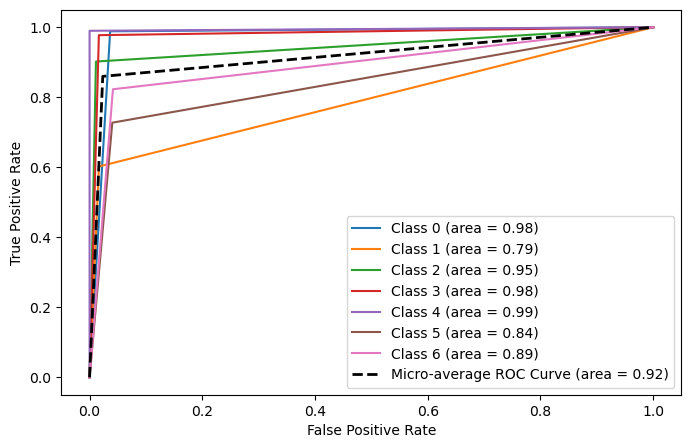

Micro-average AUROC: 0.92


In [16]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_curve, auc
from sklearn.metrics import roc_auc_score
import numpy as np
import matplotlib.pyplot as plt


# Predictions
y_pred = model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{conf_matrix}")

n_classes = len(np.unique(y_test))


# Convert to binary format for each class
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
y_pred_bin = label_binarize(y_pred, classes=np.unique(y_test))

# Compute ROC curve for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_bin[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
# Compute micro-average ROC curve
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_pred_bin.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot ROC curves
plt.figure(figsize=(8, 5))

for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (area = {roc_auc[i]:.2f})')

plt.plot(fpr["micro"], tpr["micro"], label=f'Micro-average ROC Curve (area = {roc_auc["micro"]:.2f})', linestyle='--', linewidth=2, color='black')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

# Calculate micro-average AUROC
micro_auc = roc_auc_score(y_test_bin, y_pred_bin, average='micro')

print(f'Micro-average AUROC: {micro_auc:.2f}')


## Part 2 : Brute Force LOO Influence
### Select (manually or randomly) 10 training data points (i.e., rows) and compute the exact leave-one-out LOO influence of these examples on your chosen primary metric.

In [10]:
# Assuming X is your feature matrix and y is your target variable
import numpy as np

# Set a seed for reproducibility
np.random.seed(42)

# Randomly select 10 indices of training data points
random_indices = np.random.choice(len(X), size=10, replace=False)

# Extract the corresponding feature matrix and target variable
X_random_selected = X.iloc[random_indices]
print(X_random_selected)

     Gender        Age    Height      Weight family_history_with_overweight  \
544       0  20.406871  1.755978   53.699561                              1   
1987      0  26.000000  1.624950  111.004920                              1   
420       1  18.000000  1.850000   60.000000                              1   
527       0  21.000000  1.520000   42.000000                              0   
196       1  22.000000  1.750000   74.000000                              1   
744       1  18.000000  1.738702   50.248677                              1   
1635      1  26.684354  1.819535  118.332689                              1   
324       0  30.000000  1.650000   71.000000                              1   
1449      0  23.099906  1.571812   78.997166                              1   
634       0  23.000000  1.710129   50.079991                              1   

     FAVC      FCVC       NCP CAEC SMOKE      CH2O SCC       FAF       TUE  \
544     1  2.000000  3.891994    1     0  1.863930  